In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

Загрузка данных

In [5]:
original_train = pd.read_csv('data.csv', sep=",")

In [6]:
train = original_train.drop_duplicates()

Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Основные характеристики датасетов

In [7]:
train.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [8]:
train.shape

(6819, 96)

In [9]:
train_subset = train.head(500)

In [10]:
train_subset.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [11]:
train_subset.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [12]:
train_subset.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Вывод. Представленный набор данных не содержит пропусков в обучающей выборке.

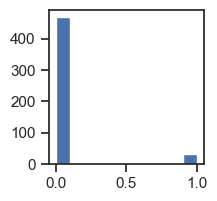

In [13]:
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train_subset['Bankrupt?'])
plt.show()

In [14]:
train_subset['Bankrupt?'].value_counts()

0    469
1     31
Name: Bankrupt?, dtype: int64

In [15]:
total = train_subset.shape[0]
class_0, class_1 = train_subset['Bankrupt?'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 93.8%, а класс 1 составляет 6.2%.


Вывод. Дисбаланс классов присутствует

In [16]:
train_subset.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [17]:
train_subset = train_subset.copy()
train_subset['dataset'] = 'TRAIN'

In [30]:
join_cols = ['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax', ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Net Income Flag', ' Equity to Liability', 'dataset']

In [31]:
data_all = pd.concat([train_subset[join_cols]])

In [32]:
assert data_all.shape[0] == train_subset.shape[0]

In [33]:
data_all.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,dataset
0,1,0.370594,0.424389,0.405750,0.290202,0.026601,0.564050,1,0.016469,TRAIN
1,1,0.464291,0.538214,0.516730,0.283846,0.264577,0.570175,1,0.020794,TRAIN
2,1,0.426071,0.499019,0.472295,0.290189,0.026555,0.563706,1,0.016474,TRAIN
3,1,0.399844,0.451265,0.457733,0.281721,0.026697,0.564663,1,0.023982,TRAIN
4,1,0.465022,0.538432,0.522298,0.278514,0.024752,0.575617,1,0.035490,TRAIN


In [39]:
scale_cols = ['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Interest Coverage Ratio (Interest expense to EBIT)', ' Equity to Liability']

In [40]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_all[scale_cols])

In [41]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_all[new_col_name] = sc1_data[:,i]

In [42]:
data_all.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,dataset,Bankrupt?_scaled,Degree of Financial Leverage (DFL)_scaled,Interest Coverage Ratio (Interest expense to EBIT)_scaled,Net Income Flag_scaled,Equity to Liability_scaled,ROA(C) before interest and depreciation before interest_scaled,ROA(A) before interest and % after tax_scaled,ROA(B) before interest and depreciation after tax_scaled
0,1,0.370594,0.424389,0.405750,0.290202,0.026601,0.564050,1,0.016469,TRAIN,1.0,0.005130,0.564050,0.0,0.037652,0.570578,0.623531,0.602537
1,1,0.464291,0.538214,0.516730,0.283846,0.264577,0.570175,1,0.020794,TRAIN,1.0,0.248355,0.570175,0.0,0.059991,0.746634,0.816810,0.793088
2,1,0.426071,0.499019,0.472295,0.290189,0.026555,0.563706,1,0.016474,TRAIN,1.0,0.005083,0.563706,0.0,0.037680,0.674819,0.750255,0.716794
3,1,0.399844,0.451265,0.457733,0.281721,0.026697,0.564663,1,0.023982,TRAIN,1.0,0.005228,0.564663,0.0,0.076456,0.625538,0.669166,0.691792
4,1,0.465022,0.538432,0.522298,0.278514,0.024752,0.575617,1,0.035490,TRAIN,1.0,0.003240,0.575617,0.0,0.135888,0.748008,0.817180,0.802647


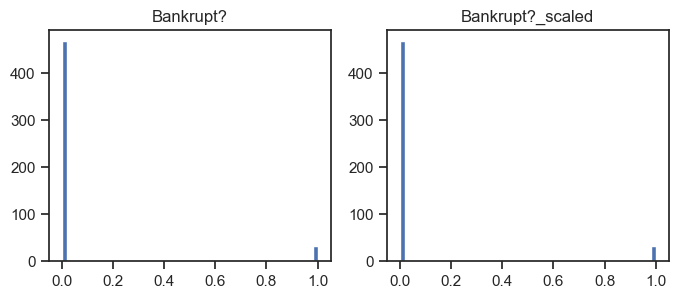

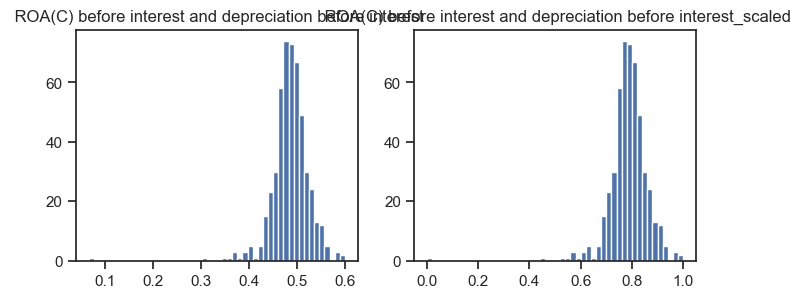

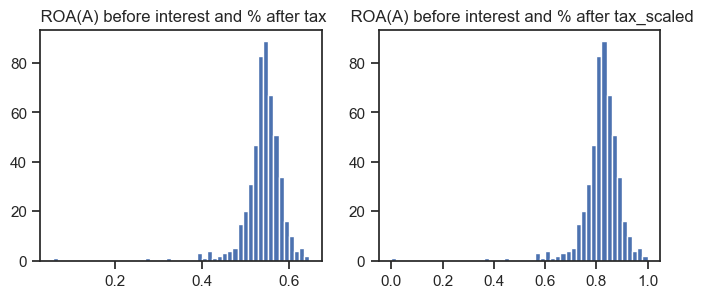

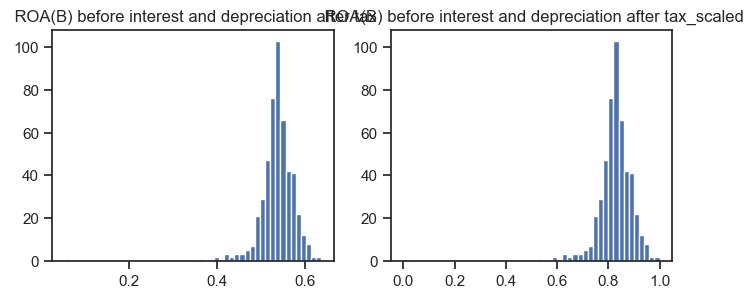

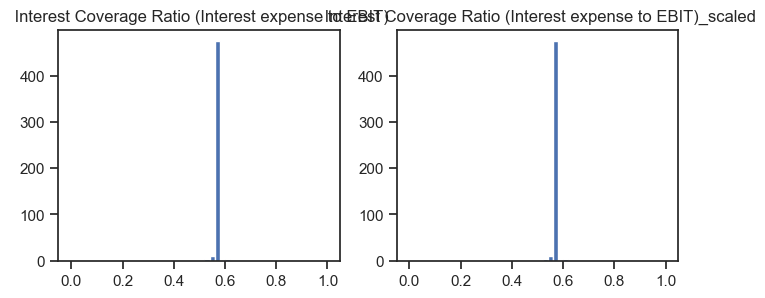

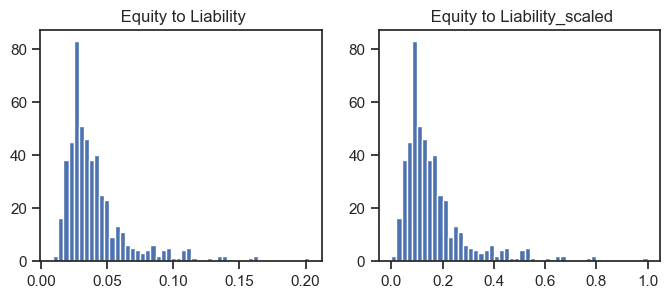

In [43]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_all[col], 50)
    ax[1].hist(data_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения

In [45]:
corr_cols_1 = scale_cols + ['Bankrupt?']
corr_cols_1

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Equity to Liability',
 'Bankrupt?']

In [46]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['Bankrupt?']
corr_cols_2

['Bankrupt?_scaled',
 ' ROA(C) before interest and depreciation before interest_scaled',
 ' ROA(A) before interest and % after tax_scaled',
 ' ROA(B) before interest and depreciation after tax_scaled',
 ' Interest Coverage Ratio (Interest expense to EBIT)_scaled',
 ' Equity to Liability_scaled',
 'Bankrupt?']

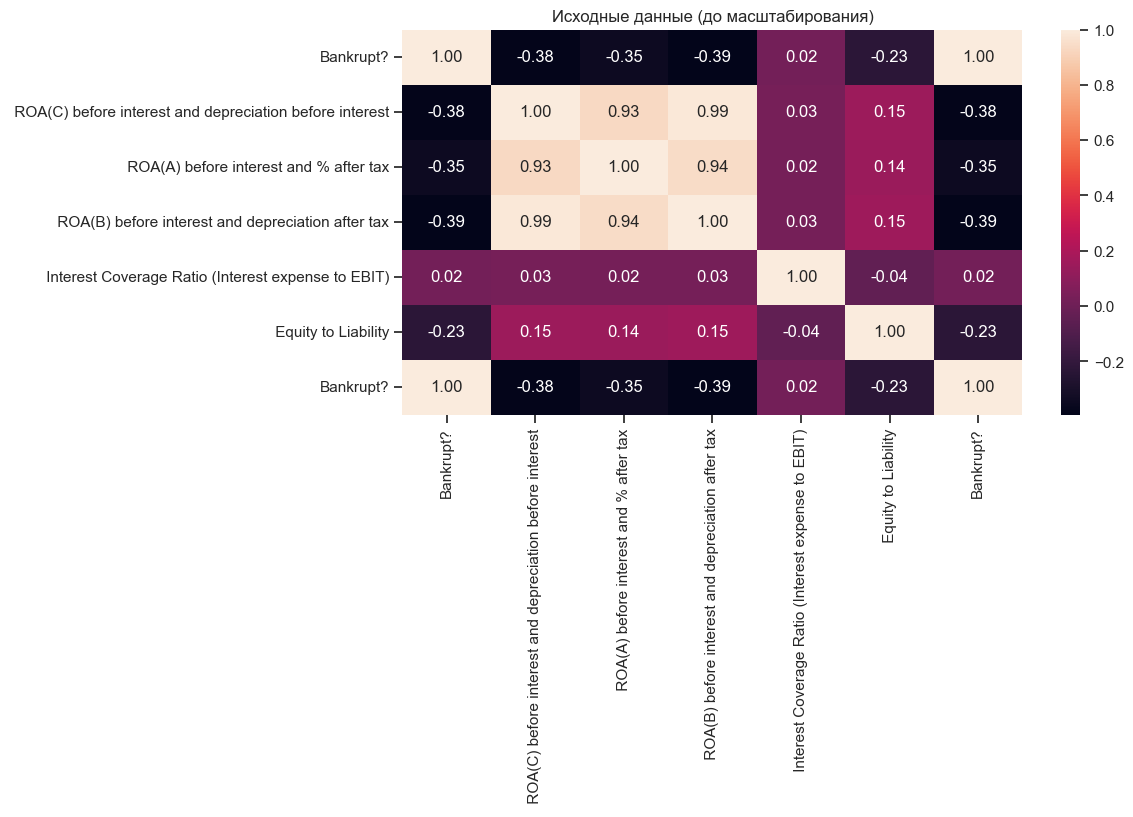

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_all[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

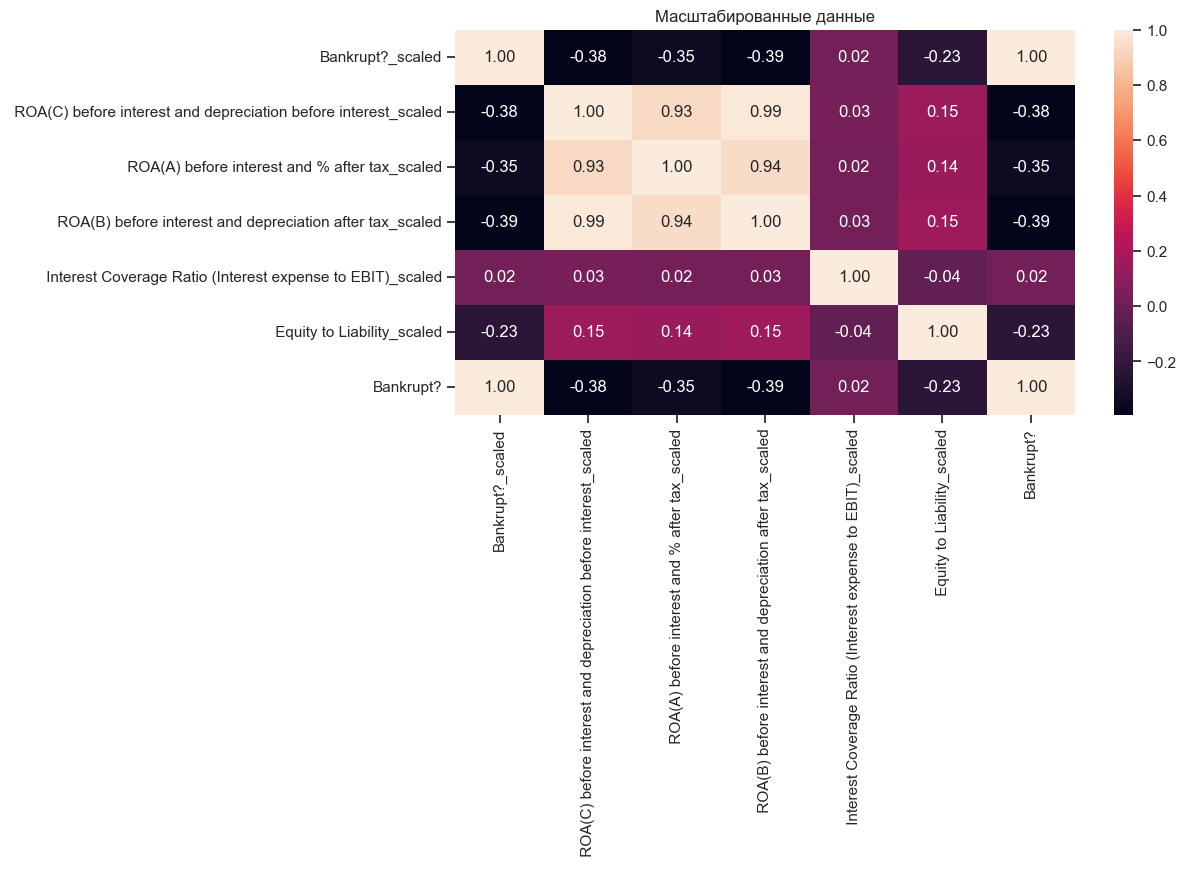

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_all[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы видно, что корреляционные матрицы для исходных и масштабированных данных совпадают.

Сохранение и визуализация метрик

В качестве метрик для решения задачи классификации будем использовать: Метрики, формируемые на основе матрицы ошибок:

Метрика precision: Можно переводить как точность.

precision=TPTP+FP Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция precision_score.

Метрика recall (полнота): recall=TPTP+FN Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция recall_score.

Метрика F1 -мера Для того, чтобы объединить precision и recall в единую метрику используется Fβ -мера, которая вычисляется как среднее гармоническое от precision и recall:

Fβ=(1+β2)⋅precision⋅recallprecision+recall где β определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при β=1 :

F1=2⋅precision⋅recallprecision+recall Для вычисления используется функция f1_score.

Метрика ROC AUC Основана на вычислении следующих характеристик:

TPR=TPTP+FN

True Positive Rate, откладывается по оси ординат. Совпадает с recall.
FPR=FPFP+TN

False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.
Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

In [51]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()  

Для задачи классификации будем использовать следующие модели: Метод опорных векторов и Случайный лес 

In [52]:
train_data_all = data_all[data_all['dataset']=='TRAIN']
train_data_all.shape

(500, 18)

In [53]:
task_clas_cols = ['Bankrupt?_scaled',
 ' ROA(C) before interest and depreciation before interest_scaled',
 ' ROA(A) before interest and % after tax_scaled',
 ' ROA(B) before interest and depreciation after tax_scaled',
 ' Interest Coverage Ratio (Interest expense to EBIT)_scaled',
 ' Equity to Liability_scaled']

In [54]:
clas_X_train = train_data_all[task_clas_cols]
clas_Y_train = train_data_all['Bankrupt?']
clas_X_train.shape, clas_Y_train.shape

((500, 6), (500,))

Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [55]:
clas_models = {'SVC':SVC(probability=True),
               'RF':RandomForestClassifier()}

In [56]:
clasMetricLogger = MetricLogger()

In [57]:
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

def clas_train_model(model_name, model, clas_X_train, clas_Y_train, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)

    Y_pred = model.predict(clas_X_train)

    Y_pred_proba_temp = model.predict_proba(clas_X_train)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(clas_Y_train, Y_pred)
    recall = recall_score(clas_Y_train, Y_pred)
    f1 = f1_score(clas_Y_train, Y_pred)
    roc_auc = roc_auc_score(clas_Y_train, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))   
    draw_roc_curve(clas_Y_train, Y_pred_proba, ax[0])

    cm = confusion_matrix(clas_Y_train, Y_pred)
    disp = ConfusionMatrixDisplay.from_estimator(model, clas_X_train, clas_Y_train, display_labels=['0','1'], cmap=plt.cm.Blues, normalize='true', ax=ax[1])
    
    fig.suptitle(model_name)
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16324\2377336643.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16324\2377336643.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16324\2377336643.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16324\2377336643.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


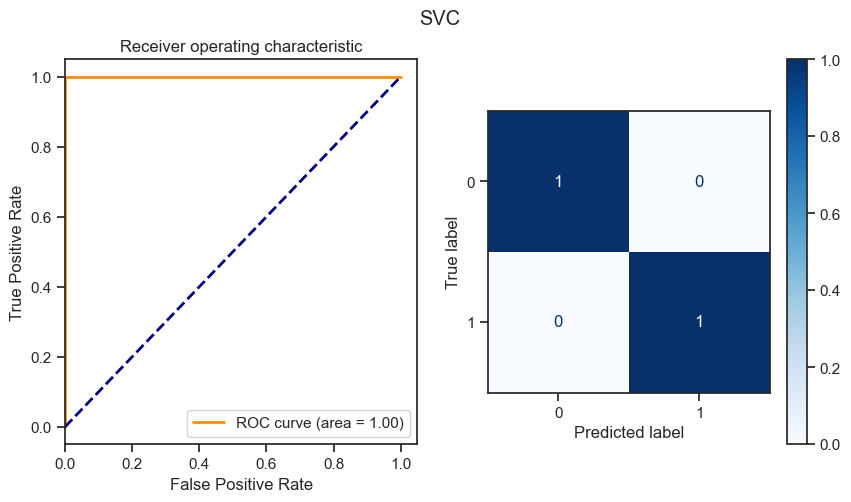

C:\Users\HP\AppData\Local\Temp\ipykernel_16324\2377336643.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16324\2377336643.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16324\2377336643.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16324\2377336643.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


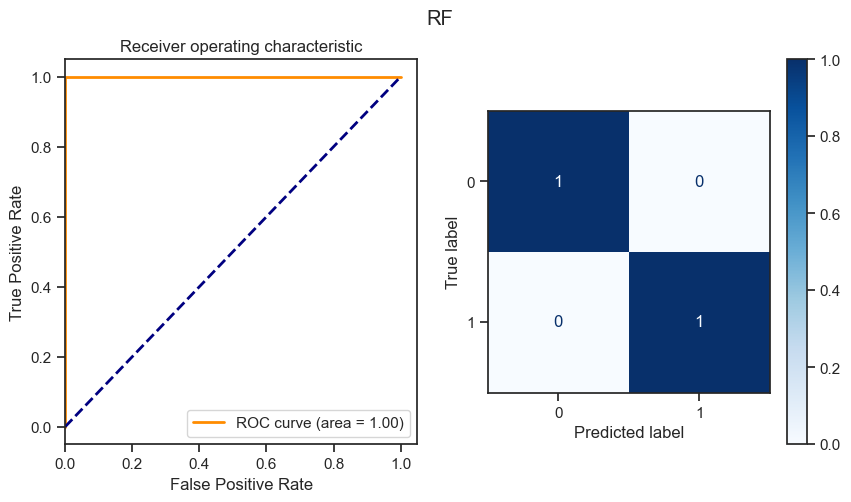

In [59]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clas_X_train, clas_Y_train, clasMetricLogger)

Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [60]:
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

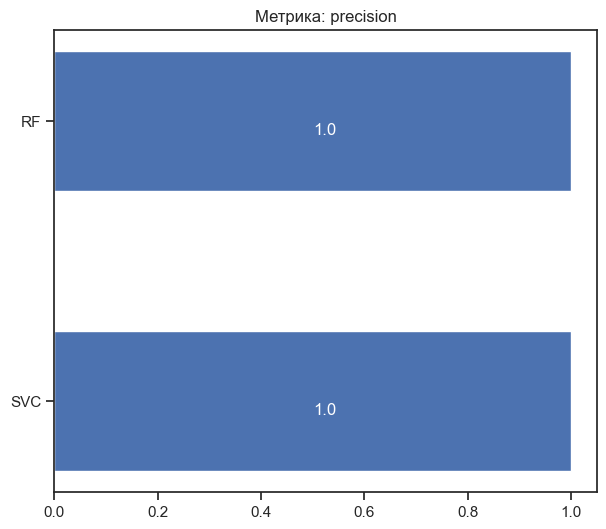

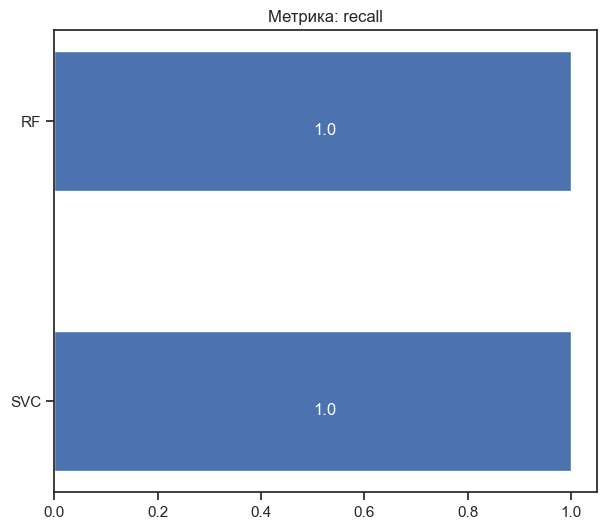

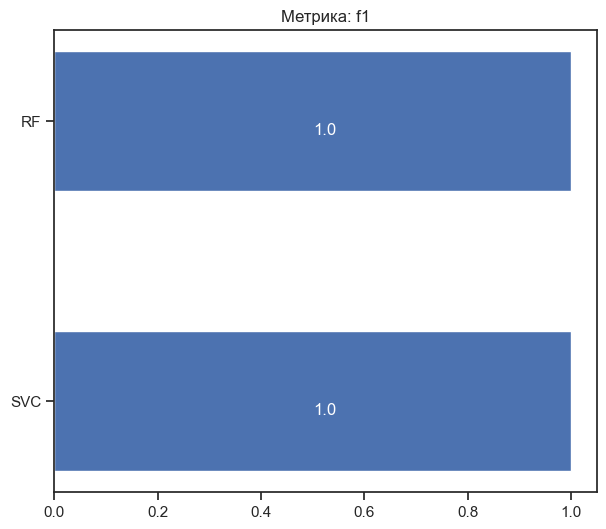

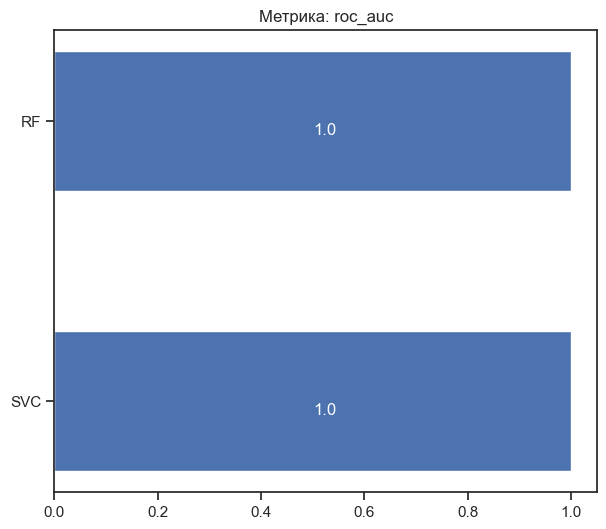

In [61]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))